In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Data Prep

MovieLens Dataset - Rating

In [60]:
movielens_rating = pd.read_csv("../Data_Lab/ratings.csv", usecols=["userId", "movieId", "rating"]) 
movielens_rating.head()

,userId,movieId,rating
0,1,307,3.5
1,1,481,3.5
2,1,1091,1.5
3,1,1257,4.5
4,1,1449,4.5


In [61]:
movielens_rating.shape

(27753444, 3)

MovieLens Dataset - Titles

In [62]:
movielens_titles = pd.read_csv("../Data_Lab/movies.csv")
movielens_titles.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [63]:
movielens_titles.shape

(58098, 3)

Lets merge the ratings and title data set to 1 dataframe.
I will call it movielens.

In [93]:
movielens = pd.merge(movielens_rating, movielens_titles, on='movieId')
movielens.head()

,userId,movieId,rating,title,genres
0,1,307,3.5,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
1,6,307,4.0,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
2,56,307,4.0,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
3,71,307,5.0,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
4,84,307,3.0,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama


In [104]:
movielens.shape

(27753444, 5)

The Dataset is very large at this point. Lets try making it a bit smaller.

I will give every movie an average rating.

In [107]:
# Group by movieId and calculate the average rating
grouped_data = movielens.groupby('movieId').agg({'rating': ['mean', 'count'], 'title': 'first', 'genres': 'first'}).reset_index()


# Reset the index and flatten the multi-level column names
grouped_data.columns = ['_'.join(col).rstrip('_') for col in grouped_data.columns.values]
grouped_data.reset_index(inplace=True)


# Dropping the index column
grouped_data.drop(columns=['index'], inplace=True)

# Renaming columns
grouped_data.rename(columns={'rating_mean': 'Average_Rating',
                   'rating_count': 'Votes',
                   'title_first': 'Title',
                   'genres_first': 'Genre'}, inplace=True)



grouped_data.head()

,movieId,Average_Rating,Votes,Title,Genre
0,1,3.886649,68469,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,3.246583,27143,Jumanji (1995),Adventure|Children|Fantasy
2,3,3.173981,15585,Grumpier Old Men (1995),Comedy|Romance
3,4,2.874540,2989,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,3.077291,15474,Father of the Bride Part II (1995),Comedy


In [108]:
grouped_data.shape

(53889, 5)

I will also remove all titles with less than a 1000 votes.

In [110]:

# Filter out movies with less than 500 occurrences
ratings_summary_filtered = grouped_data[grouped_data['Votes'] >= 1000]

# Display the result
ratings_summary_filtered.head()

,movieId,Average_Rating,Votes,Title,Genre
0,1,3.886649,68469,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,3.246583,27143,Jumanji (1995),Adventure|Children|Fantasy
2,3,3.173981,15585,Grumpier Old Men (1995),Comedy|Romance
3,4,2.874540,2989,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,3.077291,15474,Father of the Bride Part II (1995),Comedy


In [111]:
ratings_summary_filtered.shape

(3931, 5)

Nice! The dataframe is down to 3,931 rows from 27,753,444!

I noticed the title contains the year aswell. We could extract this to a new column. Might be useful.

In [112]:
movielens_clean = ratings_summary_filtered.copy()

# Extract the year from the title and create a new column 'year'
movielens_clean['Year'] = movielens_clean['Title'].apply(lambda x: int(re.search(r'\((\d{4})\)', x).group(1)) if re.search(r'\((\d{4})\)', x) else None)


movielens_clean.head()

,movieId,Average_Rating,Votes,Title,Genre,Year
0,1,3.886649,68469,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,2,3.246583,27143,Jumanji (1995),Adventure|Children|Fantasy,1995.0
2,3,3.173981,15585,Grumpier Old Men (1995),Comedy|Romance,1995.0
3,4,2.874540,2989,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
4,5,3.077291,15474,Father of the Bride Part II (1995),Comedy,1995.0


Nice! Now we have a movie list with at least 1000 votes with the features:

-   Average rating
-   Votes
-   Title 
-   Genre
-   Year

Lets explore the dataframe!

-------------------------------

In [31]:
#-------------------------------- EXTRA -------------------------------------------------------
# Added this dataset to use for EDA and charts. This is the list with all the votes included.
movielens_full = movielens.groupby('title').agg({'rating': ['mean', 'count']}).reset_index()

# Extract the year from the title and create a new column 'year'
movielens_full['year'] = movielens_full['title'].apply(lambda x: int(re.search(r'\((\d{4})\)', x).group(1)) if re.search(r'\((\d{4})\)', x) else None)
movielens_full.columns = ['title', 'average_rating', 'count', 'year']

In [54]:
movielens_clean.isnull().values.any(), movielens_full.isnull().values.any()

(True, True)

-----------------------

# EDA

Lets take a more visual approach and look at our dataset.

I will start by looking at top ten movies with the highest average rating

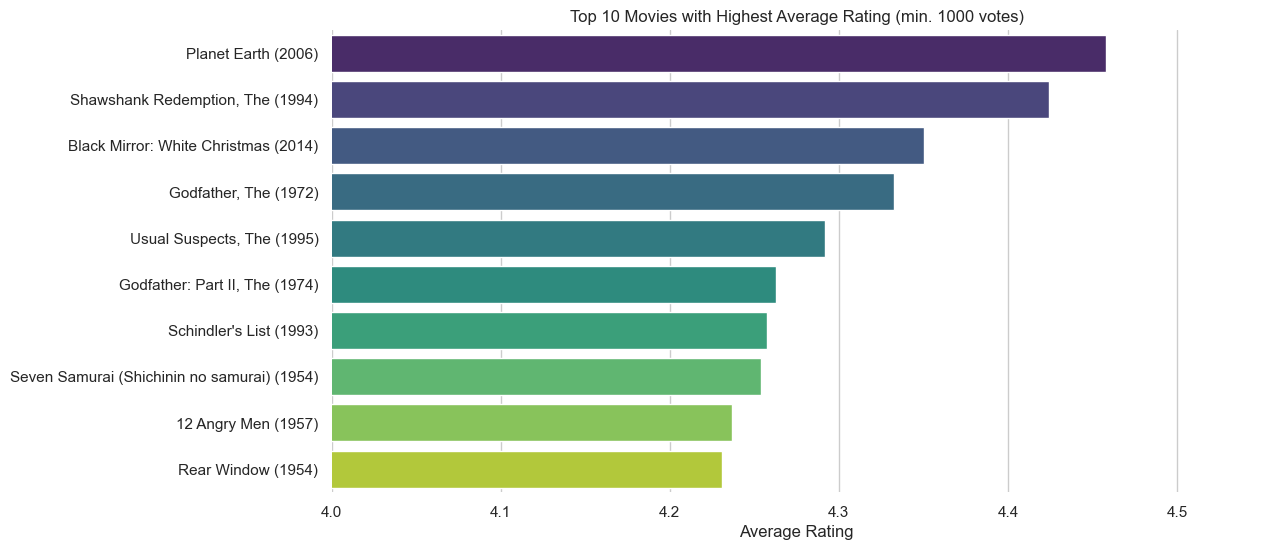

In [52]:
top_10_movies = movielens_clean.sort_values(by='Avg_Rating', ascending=False).head(10)

# Plot the top 10 movies with the highest average rating
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  # Set the Seaborn style to whitegrid
sns.barplot(x=top_10_movies['Avg_Rating'], y=top_10_movies['Title'], palette='viridis')
plt.xlabel('Average Rating')
plt.ylabel('')
plt.xlim(4, 4.55)  # Set the x-axis range 
plt.title('Top 10 Movies with Highest Average Rating (min. 1000 votes)')
sns.despine(left=True, bottom=True)  # Removes the top and right spines for a cleaner look
plt.show()

### Distribution of average rating across movies

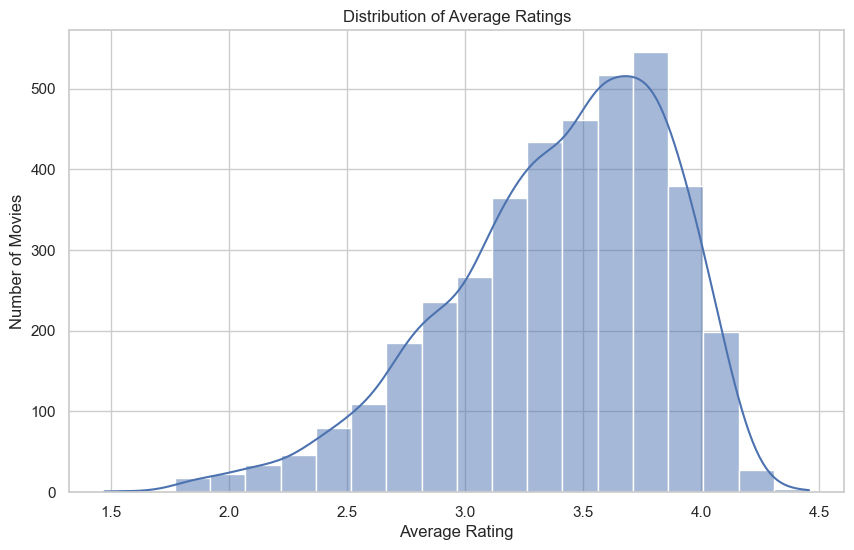

Mean rating: 3.393804897366287
Median rating: 3.473007712082262
Standard deviation: 0.47403035845309105


In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(movielens_clean['Avg_Rating'], bins=20, kde=True)
plt.xlabel('Average Rating')
plt.ylabel('Number of Movies')
plt.title('Distribution of Average Ratings')
plt.show()

mean_rating = movielens_clean['Avg_Rating'].mean()
median_rating = movielens_clean['Avg_Rating'].median()
std_rating = movielens_clean['Avg_Rating'].std()

print("Mean rating:", mean_rating)
print("Median rating:", median_rating)
print("Standard deviation:", std_rating)



In a "symmetric" normal distribution we could make some assumptions about how are data is dispersed within percentages, using Standard deviation.

But here it seems like the data is left skewed (visual observation and the Mean < Median) so its not safe to make those assumptions. Lets double check using skew.

In [34]:
skewness = movielens_clean['Avg_Rating'].skew()

print("Skewness:", skewness)

if skewness < 0:
    print("The data is left-skewed.")
elif skewness > 0:
    print("The data is right-skewed.")
else:
    print("The data is approximately symmetric.")

Skewness: -0.7302334708652398
The data is left-skewed.


-   This could mean that simply that we have more movies with lower rating.
-   We might have more outliers on the lower end.
-   The median might be a better measure of the central tendency than the mean.

Given that this data represents movie ratings, it's reasonable for the distribution to be left-skewed, as you are more likely to find outliers with low rating.

### How the number of votes relate to the average rating

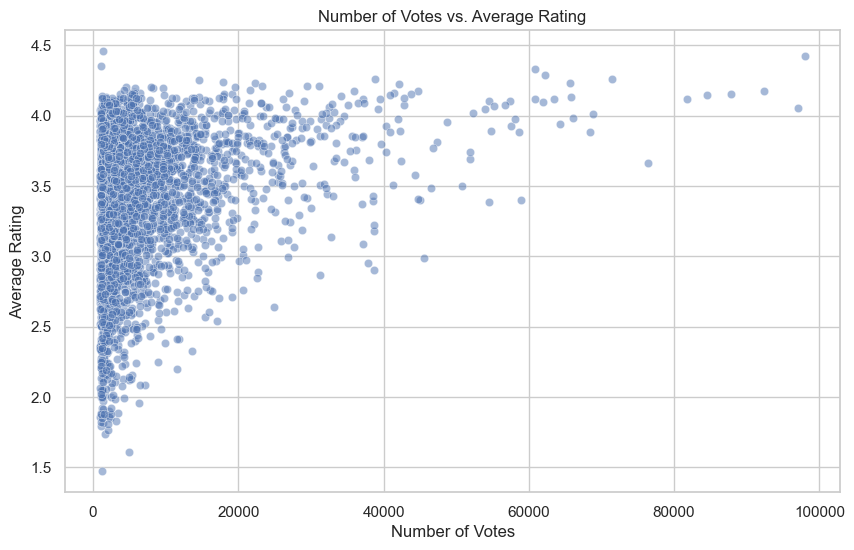

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=movielens_clean['Votes'], y=movielens_clean['Avg_Rating'], alpha=0.5)
plt.xlabel('Number of Votes')
plt.ylabel('Average Rating')
plt.title('Number of Votes vs. Average Rating')

plt.show()

This chart presents some insights:

- A higher-rated movie tends to attract more votes, likely due to factors such as popularity, visibility, and quality.

- Although more votes may not directly lead to higher ratings, accumulating votes seems to potentially shield a movie from falling into the bottom-tier of ratings.


This may shed light on the phenomenon of movies considered "so bad, they're good!" – possibly attributed to effective marketing campaigns.

As the number of votes increases, the likelihood of receiving a bottom-tier rating appears to decrease.


### Top 10 most popular movies (by number of votes)

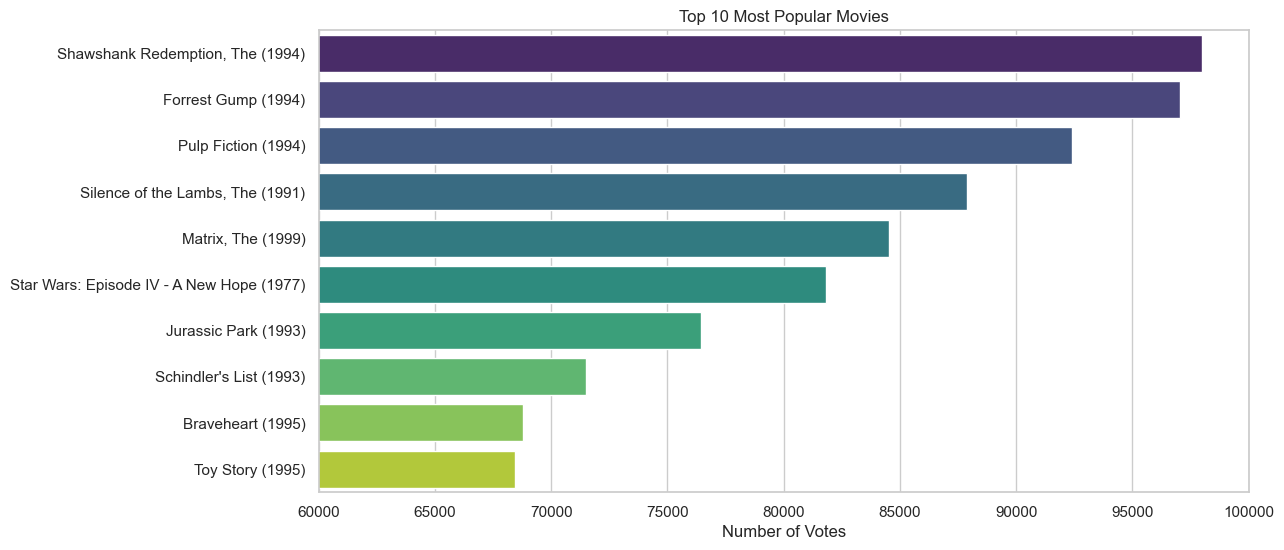

In [55]:
top_10_popular_movies = movielens_clean.sort_values(by='Votes', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_popular_movies['Votes'], y=top_10_popular_movies['Title'], palette='viridis')
plt.xlabel('Number of Votes')
plt.ylabel('')
plt.title('Top 10 Most Popular Movies')
plt.xlim(60000, 100000)  # Set the x-axis range 
plt.show()


No suprises here!

### Distribution of movies by release year

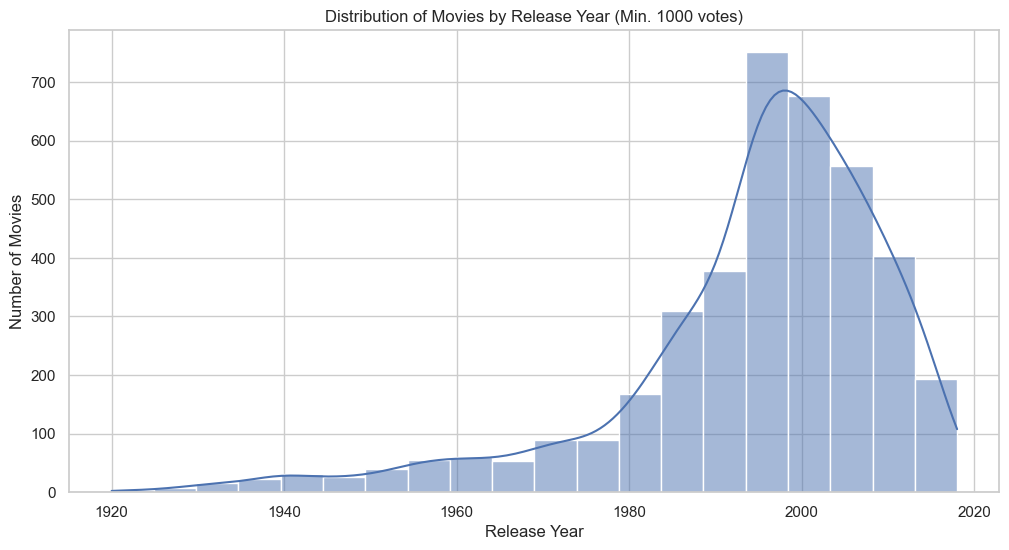

In [56]:
plt.figure(figsize=(12, 6))
sns.histplot(movielens_clean['Year'], bins=20, kde=True)
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movies by Release Year (Min. 1000 votes)')
plt.show()

Interesting, movies with at least 1000 votes was the highest around the year 2000.

Lets check all movies.

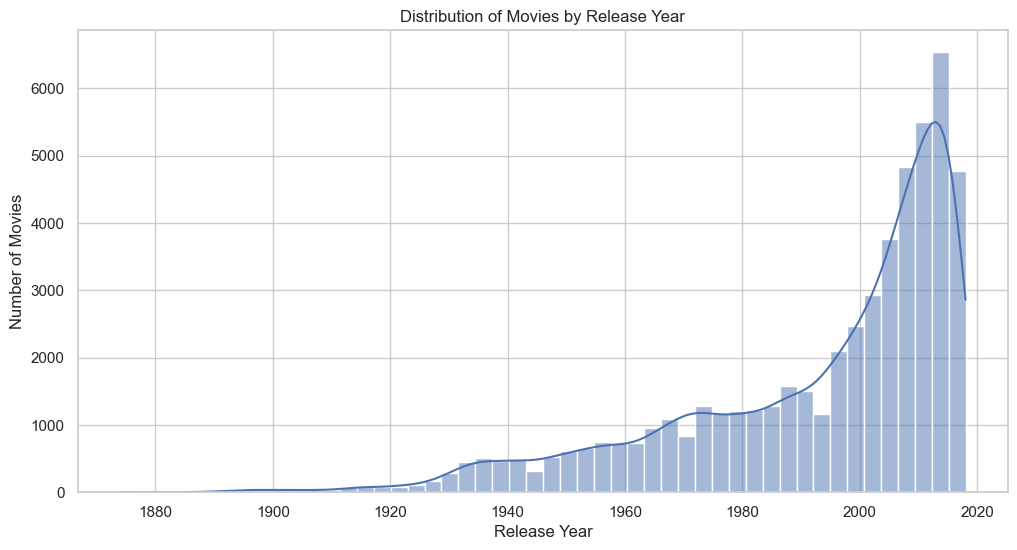

In [38]:
plt.figure(figsize=(12, 6))
sns.histplot(movielens_full['year'], bins=50, kde=True)
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movies by Release Year')
plt.show()

Seems that movie production increased dramatically over the years. Considering the movies with at least 1000 votes peaked around the year 2000.

I would suspect that the best movies should be around the year 2000. Lets check.

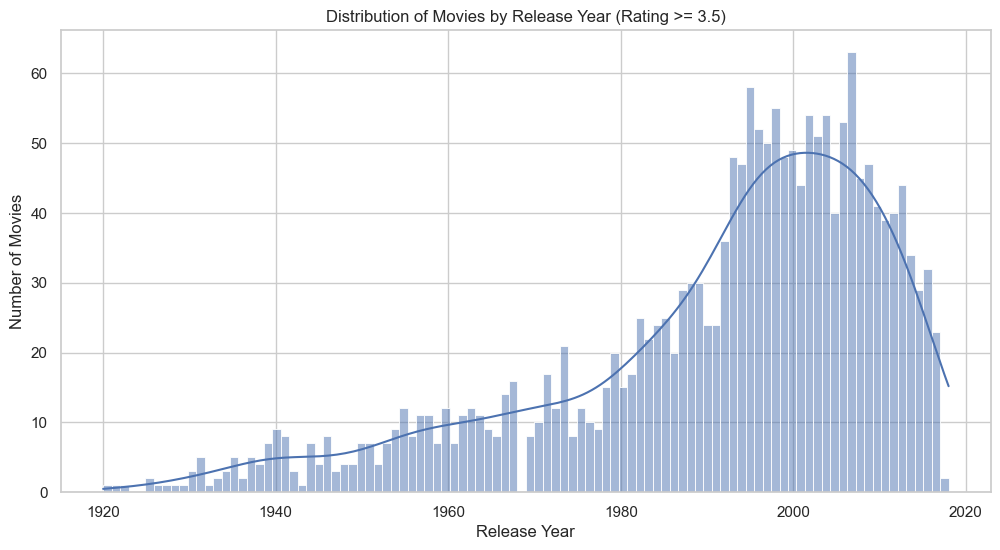

In [49]:
# Filter dataset to only include movies with at least a 3.5 rating
high_rated_movies = movielens_clean[movielens_clean['Avg_Rating'] >= 3.5]

# Create a histogram of the distribution of movie release years
plt.figure(figsize=(12, 6))
sns.histplot(data=high_rated_movies, x='Year', bins=100, kde=True)
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movies by Release Year (Rating >= 3.5)')
plt.show()

Seems to be true.

We could try to draw some conclusions and summarize.

-   The last decade seems to have an dramatic increase in the amount of movies made.
-   The quality seems to be dropping after peaking around the year 2000.
-   A higher-rated movie tends to attract more votes, likely due to factors such as popularity, visibility, and quality.
-   Although more votes may not directly lead to higher ratings, accumulating votes seems to potentially shield a movie from falling into the bottom-tier of ratings.

This may indicate as streaming came in to play, the focus became more quantity over quality. To retain more users for longer time.

So further EDA could involve looking over movies and the streaming services.

Considering everything, maybe a good recommendation system might be to give more importance to number of votes.
Focus on votes and rating